# Package Calling

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.interpolate import interp1d
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
%matplotlib notebook 

In [9]:
pd.read_excel

<function pandas.io.excel._base.read_excel(io, sheet_name=0, header=0, names=None, index_col=None, usecols=None, squeeze=False, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, verbose=False, parse_dates=False, date_parser=None, thousands=None, comment=None, skipfooter=0, convert_float=True, mangle_dupe_cols=True, **kwds)>

## PDF Calling

In [10]:
Cu7PSe6_PDF = pd.read_excel('Cu7PSe6 PDF 00-033-0482.xlsx',                
        #userows='1:10'
        names=['2q','Intensity'])

# Example of a PDF for Cu7PSe6. IF you want the excel to see how it 
# should be set up to properly call the file, let me know!!

In [11]:
Cu3PSe4_PDF = pd.read_excel('Cu3PSe4 PDF 04-006-8347.xlsx',  #excel file where data is located                                #selects the last sheet in the excel workbook to be used
        usecols='A,B', #these are the columns in the excel sheet that data is loaded from
        #userows='1:10'
        names=['2q','Intensity'])  

In [12]:
Cu2_xSe_PDF = pd.read_excel('Cu2-xSex PDF 00-006-0680.xlsx',             #selects the last sheet in the excel workbook to be used
        usecols='A,B', #these are the columns in the excel sheet that data is loaded from
        #userows='1:10'
        names=['2q','Intensity'])

## Data 

In [6]:
NN_01_88 = pd.read_csv('NN-01-88_2021-03-29_fit.txt',
                 sep=",",
                 header=1,
                 names=["2q", "y_exp", "diff", "y_calc"])
print(NN_01_88)


# Example of a PDF for Cu7PSe6. IF you want the excel to see how it 
# should be set up to properly call the file, let me know!!

           2q  y_exp        diff      y_calc
0     24.0001   2073   83.369897  1989.63010
1     24.0205   2022   28.691040  1993.30896
2     24.0409   2054   57.022499  1996.97750
3     24.0614   2085   84.345201  2000.65480
4     24.0818   2123  118.693815  2004.30619
...       ...    ...         ...         ...
1759  59.9229   1743   47.171268  1695.82873
1760  59.9433   1765   47.564185  1717.43582
1761  59.9638   1839  105.935434  1733.06457
1762  59.9842   1901  159.962153  1741.03785
1763  60.0046   1805   63.351097  1741.64890

[1764 rows x 4 columns]


## Figure Making

<IPython.core.display.Javascript object>


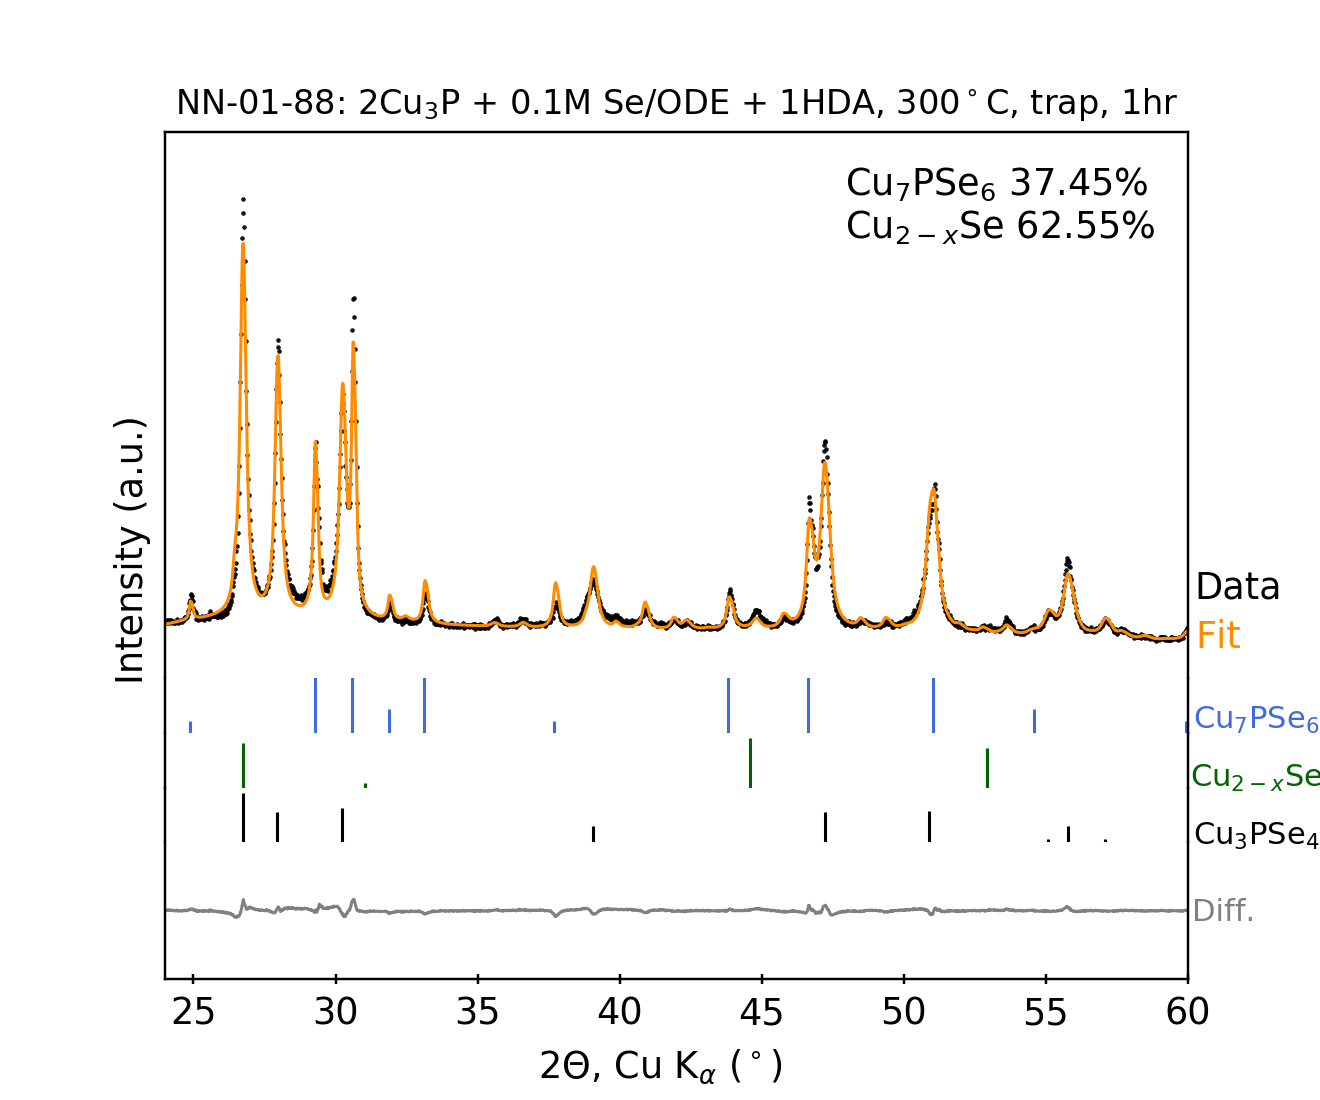

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.


In [9]:
fig = plt.figure(figsize=(6,5)) 
gs = gridspec.GridSpec(5, 1, height_ratios=[1,0.1,.1,0.1,0.25]) #rows, columns, [ht ratios] 
gs.update(wspace=0.025, hspace=0.0) # set the spacing between axes.
plt.xlim(20,60) # Change limit based on your 2 theta
legLoc='upper right' #legend location

# I made this code kind of confusing, sorry. But the number in the brackets after gs[X] 
# refers to where that subplot is located. so here it is the third section... see below

ax1 = plt.subplot(gs[3])
x = Cu3PSe4_PDF['2q']
y = Cu3PSe4_PDF['Intensity']
ax1.set_xlim(24, 60)
ax1.set_ylim(10,1100) 
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.vlines(x, [0], y, lw=1, color = 'Black', label = '')
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(direction = 'inout', top = False, bottom = False, right = False, left = False)
ax1.legend(loc = legLoc, frameon = False, bbox_transform=plt.gcf().transFigure)

ax2 = plt.subplot(gs[2])
x1 = Cu2_xSe_PDF['2q']
y1 = Cu2_xSe_PDF['Intensity']
ax2.set_xlim(24, 60)
ax2.set_ylim(0,110)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.vlines(x1, [0], y1, lw=1, color = 'darkgreen', label = '')
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.tick_params(direction = 'inout', top = False, bottom = False, right = False, left = False)
ax2.legend(loc = legLoc, frameon = False, bbox_transform=plt.gcf().transFigure)
    
ax3 = plt.subplot(gs[0])
x2 = NN_01_88['2q']
y2 = NN_01_88['y_calc']
ax3.set_xlim(24, 60)
ax3.set_ylim(0,20000) # change this based on the intensity of your XRD pattern.
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.plot(x2, y2, lw=1, color = 'darkorange', label = 'Cu$_7$PSe$_6$ 37.45% \nCu$_{2-x}$Se 62.55%')
ax3.spines['bottom'].set_visible(False)
ax3.tick_params(direction = 'inout', top = True, bottom = False, right = False, left = False)
ax3.legend(loc = legLoc, frameon = False, bbox_transform=plt.gcf().transFigure)

leg_3 = ax3.legend(handlelength=0, handletextpad=0, fancybox=False, frameon=False, fontsize=12)
for item in leg_3.legendHandles:
    item.set_visible(False)
for text in leg_3.get_texts():
    text.set_color("Black")

plt.title('NN-01-88: 2Cu$_3$P + 0.1M Se/ODE + 1HDA, 300$^\circ$C, trap, 1hr', fontsize = 11)

ax4 = plt.subplot(gs[0])
x3 = NN_01_88['2q']
y3 = NN_01_88['y_exp']
ax4.set_xlim(24, 60)
ax4.set_ylim(0,20000)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.scatter(x3, y3, s=0.225, color = 'black', label = '')
ax4.spines['bottom'].set_visible(False)
ax4.tick_params(direction = 'inout', top = False, bottom = False, right = False, left = False)

ax5 = plt.subplot(gs[1])
x4 = Cu7PSe6_PDF['2q']
y4 = Cu7PSe6_PDF['Intensity']
ax5.set_xlim(24, 60)
ax5.set_ylim(6,15)
ax5.set_xticklabels([])
ax5.set_yticklabels([])
ax5.vlines(x4, [0], y4, lw=1, color = 'royalblue', label = '')
ax5.spines['bottom'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.tick_params(direction = 'inout', top = False, bottom = False, right = False, left = False)

ax6 = plt.subplot(gs[4])
x5 = NN_01_88['2q']
y5 = NN_01_88['diff']
ax6.set_xlim(24, 60)
ax6.set_ylim(-10000,10000)
ax6.set_xticklabels([20,25,30,35,40,45,50,55,60],fontsize=12)
ax6.set_yticklabels([])
ax6.plot(x5, y5, lw=1, color = 'grey', label = '')
ax6.tick_params(direction = 'inout', top = False, bottom = True, right = False, left = False)
ax6.spines['top'].set_visible(False)
ax6.legend(loc = legLoc, frameon = False, bbox_transform=plt.gcf().transFigure)

    
fig.text(0.927, .17, 'Diff.', ha='center', va='center', color = 'grey', fontsize = 10)
fig.text(0.952, .345, 'Cu$_7$PSe$_6$', ha='center', va='center', color = 'royalblue', fontsize = 10)
fig.text(0.952, .24, 'Cu$_3$PSe$_4$', ha='center', va='center', color = 'black', fontsize = 10)
fig.text(0.952, .292, 'Cu$_{2-x}$Se', ha='center', va='center', color = 'darkgreen', fontsize = 10)

fig.text(0.938, .465, 'Data', ha='center', va='center', color = 'black', fontsize = 12)
fig.text(0.923, .42, 'Fit', ha='center', va='center', color = 'darkorange', fontsize = 12)

fig.text(.5, 0.03, '$2\Theta$, Cu K$_{\\alpha}$ ($^\circ$)', ha='center', va='center',fontsize = 12)
fig.text(0.1,.5, 'Intensity (a.u.)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.savefig("NN-01-88_2021-03-29_final", dpi=1000) #Name file. this will be located in same folder
plt.show()

In [25]:
data = pd.read_csv('Cu7PSe6_2021_03-22_NN-01-85_All.txt',
                 sep="\t",
                 header=3,
                 names=["2q", "y_exp", "intensity%", "c", "D", "f"])
print(data)


# Example of a PDF for Cu7PSe6. IF you want the excel to see how it 
# should be set up to properly call the file, let me know!!